In [1]:
import jax
import jax.numpy as jnp

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("./")))))

from training import Agent
from loss import params, loss_fn, evaluate_fn
from data import generate_dataset, generate_batch_fn

import config
config.n_data = {
    "i": 100,
    "b": 100,
    "cx": 101,
    "ct": 101,
    "dx": 100,
    "dt": 602,
}
config.batch_size = {
    "dirichlet": (config.n_data["i"]+2*config.n_data["b"]+config.n_data["dx"]*config.n_data["dt"]) // 10,
    "collocation": (config.n_data["dx"]*config.n_data["dt"]+config.n_data["cx"]*config.n_data["ct"]) // 10,
}
config.iterations = 10000
config.print_every = 100
config.lr = 1e-3
config.weights = {
	"c1": 1.0,
	"c2": 1.0,
	"d1": 1.0,
	"d2": 1.0,
	"l1": 1e-8,
	"l2": 1e-8,
}

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"], config.n_data["dx"], config.n_data["dt"])
batch_fn, evaluate_batch_fn = generate_batch_fn(config.key, config.batch_size, *datasets, config.weights)

agent = Agent(params, loss_fn, evaluate_fn, "models/{}".format(config.NAME))
agent.compile(config.optimizer, config.lr)
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/03, 17:55:37, Iteration: 100, Train Loss: 1.5324e+00, c1: 1.2336e-01, c2: 1.5485e-03, d1: 1.0581e+00, d2: 3.4939e-01, l1_reg: 3.4222e+02, l2_reg: 5.4261e+01
2020/09/03, 17:55:38, Iteration: 200, Train Loss: 9.1101e-01, c1: 5.3781e-02, c2: 1.0871e-03, d1: 5.0708e-01, d2: 3.4906e-01, l1_reg: 3.4412e+02, l2_reg: 5.5506e+01
2020/09/03, 17:55:39, Iteration: 300, Train Loss: 1.0136e+00, c1: 1.8341e-01, c2: 1.4685e-03, d1: 4.7851e-01, d2: 3.5019e-01, l1_reg: 3.4396e+02, l2_reg: 5.5508e+01
2020/09/03, 17:55:40, Iteration: 400, Train Loss: 9.1347e-01, c1: 8.6630e-02, c2: 1.4177e-03, d1: 4.7434e-01, d2: 3.5108e-01, l1_reg: 3.4173e+02, l2_reg: 5.4476e+01
2020/09/03, 17:55:41, Iteration: 500, Train Loss: 8.9080e-01, c1: 7.3534e-02, c2: 8.3931e-04, d1: 4.6613e-01, d2: 3.5029e-01, l1_reg: 3.4021e+02, l2_reg: 5.3506e+01
2020/09/03, 17:55:42, Iteration: 600, Train Loss: 8.2532e-01, c1: 2.2189e-02, c2: 1.7210e-03, d1: 4.5187e-01, d2: 3.4953e-01, l1_reg: 3.4157e+02, l2_reg: 5.4262e+01
2020/09/03

2020/09/03, 17:56:22, Iteration: 5100, Train Loss: 1.9722e-01, c1: 1.9251e-02, c2: 4.6203e-02, d1: 1.5596e-02, d2: 1.1616e-01, l1_reg: 3.8141e+02, l2_reg: 8.1592e+01
2020/09/03, 17:56:23, Iteration: 5200, Train Loss: 2.0978e-01, c1: 2.9724e-02, c2: 4.7279e-02, d1: 1.5940e-02, d2: 1.1683e-01, l1_reg: 3.8157e+02, l2_reg: 8.1660e+01
2020/09/03, 17:56:24, Iteration: 5300, Train Loss: 2.0213e-01, c1: 2.6959e-02, c2: 4.5580e-02, d1: 1.5246e-02, d2: 1.1434e-01, l1_reg: 3.8166e+02, l2_reg: 8.1727e+01
2020/09/03, 17:56:25, Iteration: 5400, Train Loss: 2.1505e-01, c1: 3.8893e-02, c2: 4.6466e-02, d1: 1.4635e-02, d2: 1.1505e-01, l1_reg: 3.8183e+02, l2_reg: 8.1833e+01
2020/09/03, 17:56:26, Iteration: 5500, Train Loss: 2.1625e-01, c1: 3.8664e-02, c2: 4.7751e-02, d1: 1.4876e-02, d2: 1.1495e-01, l1_reg: 3.8191e+02, l2_reg: 8.1858e+01
2020/09/03, 17:56:27, Iteration: 5600, Train Loss: 2.0971e-01, c1: 3.3216e-02, c2: 4.6291e-02, d1: 1.5337e-02, d2: 1.1486e-01, l1_reg: 3.8193e+02, l2_reg: 8.1908e+01
2020

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [3]:
config.iterations = 500000
config.print_every = 1000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/03, 18:03:21, Iteration: 11000, Train Loss: 1.9987e-01, c1: 4.2834e-02, c2: 4.2999e-02, d1: 1.4582e-02, d2: 9.9446e-02, l1_reg: 3.8850e+02, l2_reg: 8.5567e+01
2020/09/03, 18:03:30, Iteration: 12000, Train Loss: 1.6544e-01, c1: 2.0694e-02, c2: 3.9459e-02, d1: 1.2746e-02, d2: 9.2539e-02, l1_reg: 3.9127e+02, l2_reg: 8.7131e+01
2020/09/03, 18:03:39, Iteration: 13000, Train Loss: 1.5832e-01, c1: 2.4861e-02, c2: 3.7253e-02, d1: 1.1675e-02, d2: 8.4525e-02, l1_reg: 3.9427e+02, l2_reg: 8.8905e+01
2020/09/03, 18:03:48, Iteration: 14000, Train Loss: 1.6006e-01, c1: 3.6599e-02, c2: 3.5998e-02, d1: 1.0532e-02, d2: 7.6928e-02, l1_reg: 3.9716e+02, l2_reg: 9.0812e+01
2020/09/03, 18:03:57, Iteration: 15000, Train Loss: 1.3099e-01, c1: 1.6530e-02, c2: 3.3982e-02, d1: 9.2119e-03, d2: 7.1259e-02, l1_reg: 3.9996e+02, l2_reg: 9.2696e+01
2020/09/03, 18:04:06, Iteration: 16000, Train Loss: 1.2943e-01, c1: 1.9489e-02, c2: 3.2213e-02, d1: 9.0435e-03, d2: 6.8684e-02, l1_reg: 4.0219e+02, l2_reg: 9.4349e+0

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/03, 18:04:50, Iteration: 21000, Train Loss: 1.2736e-01, c1: 2.4283e-02, c2: 3.0597e-02, d1: 8.0248e-03, d2: 6.4451e-02, l1_reg: 4.1306e+02, l2_reg: 1.0316e+02
2020/09/03, 18:04:59, Iteration: 22000, Train Loss: 1.2628e-01, c1: 2.6687e-02, c2: 2.9351e-02, d1: 6.8587e-03, d2: 6.3383e-02, l1_reg: 4.2991e+02, l2_reg: 1.2374e+02
2020/09/03, 18:05:08, Iteration: 23000, Train Loss: 1.2582e-01, c1: 3.3893e-02, c2: 2.8988e-02, d1: 4.7251e-03, d2: 5.8208e-02, l1_reg: 4.3499e+02, l2_reg: 1.3230e+02
2020/09/03, 18:05:17, Iteration: 24000, Train Loss: 1.2731e-01, c1: 3.3117e-02, c2: 3.0308e-02, d1: 6.2276e-03, d2: 5.7655e-02, l1_reg: 4.3682e+02, l2_reg: 1.3506e+02
2020/09/03, 18:05:26, Iteration: 25000, Train Loss: 1.2080e-01, c1: 2.9670e-02, c2: 2.9882e-02, d1: 4.3314e-03, d2: 5.6908e-02, l1_reg: 4.3808e+02, l2_reg: 1.3662e+02
2020/09/03, 18:05:35, Iteration: 26000, Train Loss: 1.1280e-01, c1: 2.3265e-02, c2: 2.8927e-02, d1: 4.6782e-03, d2: 5.5923e-02, l1_reg: 4.3932e+02, l2_reg: 1.3800e+0

2020/09/03, 18:12:14, Iteration: 71000, Train Loss: 7.2232e-02, c1: 2.4254e-02, c2: 1.1887e-02, d1: 2.8594e-03, d2: 3.3225e-02, l1_reg: 4.8085e+02, l2_reg: 1.6795e+02
2020/09/03, 18:12:23, Iteration: 72000, Train Loss: 7.0143e-02, c1: 2.1481e-02, c2: 1.2430e-02, d1: 3.3769e-03, d2: 3.2849e-02, l1_reg: 4.8125e+02, l2_reg: 1.6821e+02
2020/09/03, 18:12:32, Iteration: 73000, Train Loss: 6.9375e-02, c1: 1.6764e-02, c2: 1.6198e-02, d1: 3.4411e-03, d2: 3.2966e-02, l1_reg: 4.8160e+02, l2_reg: 1.6839e+02
2020/09/03, 18:12:41, Iteration: 74000, Train Loss: 6.4310e-02, c1: 1.6674e-02, c2: 1.2167e-02, d1: 2.8004e-03, d2: 3.2662e-02, l1_reg: 4.8200e+02, l2_reg: 1.6862e+02
2020/09/03, 18:12:49, Iteration: 75000, Train Loss: 7.0115e-02, c1: 2.3385e-02, c2: 1.1734e-02, d1: 2.7163e-03, d2: 3.2274e-02, l1_reg: 4.8240e+02, l2_reg: 1.6879e+02
2020/09/03, 18:12:58, Iteration: 76000, Train Loss: 6.8768e-02, c1: 2.0044e-02, c2: 1.3757e-02, d1: 2.6180e-03, d2: 3.2342e-02, l1_reg: 4.8280e+02, l2_reg: 1.6903e+0

2020/09/03, 18:19:29, Iteration: 120000, Train Loss: 7.7729e-02, c1: 3.0754e-02, c2: 1.2541e-02, d1: 3.6333e-03, d2: 3.0794e-02, l1_reg: 4.9561e+02, l2_reg: 1.8253e+02
2020/09/03, 18:19:38, Iteration: 121000, Train Loss: 6.0655e-02, c1: 1.7843e-02, c2: 9.3049e-03, d1: 2.7582e-03, d2: 3.0742e-02, l1_reg: 4.9579e+02, l2_reg: 1.8248e+02
2020/09/03, 18:19:47, Iteration: 122000, Train Loss: 6.6163e-02, c1: 2.4554e-02, c2: 8.2726e-03, d1: 2.9786e-03, d2: 3.0351e-02, l1_reg: 4.9611e+02, l2_reg: 1.8257e+02
2020/09/03, 18:19:56, Iteration: 123000, Train Loss: 6.0172e-02, c1: 1.6260e-02, c2: 9.8769e-03, d1: 3.6547e-03, d2: 3.0374e-02, l1_reg: 4.9619e+02, l2_reg: 1.8261e+02
2020/09/03, 18:20:04, Iteration: 124000, Train Loss: 5.8988e-02, c1: 1.6479e-02, c2: 8.9977e-03, d1: 2.9640e-03, d2: 3.0540e-02, l1_reg: 4.9651e+02, l2_reg: 1.8263e+02
2020/09/03, 18:20:13, Iteration: 125000, Train Loss: 6.8365e-02, c1: 2.3424e-02, c2: 1.0604e-02, d1: 3.2024e-03, d2: 3.1129e-02, l1_reg: 4.9663e+02, l2_reg: 1.8

2020/09/03, 18:26:42, Iteration: 169000, Train Loss: 5.3721e-02, c1: 1.3389e-02, c2: 8.1984e-03, d1: 2.8876e-03, d2: 2.9239e-02, l1_reg: 4.9833e+02, l2_reg: 1.8873e+02
2020/09/03, 18:26:50, Iteration: 170000, Train Loss: 5.5931e-02, c1: 1.5488e-02, c2: 8.5454e-03, d1: 3.2532e-03, d2: 2.8638e-02, l1_reg: 4.9836e+02, l2_reg: 1.8890e+02
2020/09/03, 18:26:59, Iteration: 171000, Train Loss: 5.3973e-02, c1: 1.4360e-02, c2: 7.5636e-03, d1: 3.1555e-03, d2: 2.8888e-02, l1_reg: 4.9857e+02, l2_reg: 1.8910e+02
2020/09/03, 18:27:08, Iteration: 172000, Train Loss: 5.4810e-02, c1: 1.6209e-02, c2: 7.1272e-03, d1: 2.9369e-03, d2: 2.8530e-02, l1_reg: 4.9857e+02, l2_reg: 1.8929e+02
2020/09/03, 18:27:17, Iteration: 173000, Train Loss: 5.4079e-02, c1: 1.5489e-02, c2: 7.4536e-03, d1: 2.6935e-03, d2: 2.8436e-02, l1_reg: 4.9863e+02, l2_reg: 1.8959e+02
2020/09/03, 18:27:26, Iteration: 174000, Train Loss: 6.3927e-02, c1: 2.1929e-02, c2: 1.0102e-02, d1: 2.5007e-03, d2: 2.9388e-02, l1_reg: 4.9874e+02, l2_reg: 1.8

2020/09/03, 18:33:55, Iteration: 218000, Train Loss: 4.9293e-02, c1: 1.4126e-02, c2: 5.3589e-03, d1: 2.5075e-03, d2: 2.7293e-02, l1_reg: 5.0290e+02, l2_reg: 1.9787e+02
2020/09/03, 18:34:03, Iteration: 219000, Train Loss: 5.0669e-02, c1: 1.3133e-02, c2: 6.7760e-03, d1: 2.7116e-03, d2: 2.8042e-02, l1_reg: 5.0275e+02, l2_reg: 1.9808e+02
2020/09/03, 18:34:12, Iteration: 220000, Train Loss: 5.0517e-02, c1: 1.4046e-02, c2: 5.9082e-03, d1: 3.1209e-03, d2: 2.7435e-02, l1_reg: 5.0258e+02, l2_reg: 1.9827e+02
2020/09/03, 18:34:21, Iteration: 221000, Train Loss: 5.6358e-02, c1: 1.9646e-02, c2: 5.7970e-03, d1: 3.3903e-03, d2: 2.7517e-02, l1_reg: 5.0249e+02, l2_reg: 1.9843e+02
2020/09/03, 18:34:29, Iteration: 222000, Train Loss: 5.7523e-02, c1: 2.0551e-02, c2: 6.2143e-03, d1: 3.0161e-03, d2: 2.7734e-02, l1_reg: 5.0235e+02, l2_reg: 1.9856e+02
2020/09/03, 18:34:38, Iteration: 223000, Train Loss: 5.7817e-02, c1: 1.8516e-02, c2: 7.8983e-03, d1: 3.7429e-03, d2: 2.7652e-02, l1_reg: 5.0255e+02, l2_reg: 1.9

2020/09/03, 18:41:07, Iteration: 267000, Train Loss: 5.1492e-02, c1: 1.6103e-02, c2: 5.6123e-03, d1: 3.2793e-03, d2: 2.6490e-02, l1_reg: 5.1587e+02, l2_reg: 2.4980e+02
2020/09/03, 18:41:16, Iteration: 268000, Train Loss: 6.4655e-02, c1: 2.7305e-02, c2: 7.1463e-03, d1: 2.6718e-03, d2: 2.7524e-02, l1_reg: 5.1566e+02, l2_reg: 2.5130e+02
2020/09/03, 18:41:25, Iteration: 269000, Train Loss: 5.0062e-02, c1: 1.2465e-02, c2: 7.0647e-03, d1: 3.1940e-03, d2: 2.7330e-02, l1_reg: 5.1611e+02, l2_reg: 2.5246e+02
2020/09/03, 18:41:34, Iteration: 270000, Train Loss: 5.4705e-02, c1: 1.5446e-02, c2: 7.5566e-03, d1: 4.0903e-03, d2: 2.7604e-02, l1_reg: 5.1651e+02, l2_reg: 2.5368e+02
2020/09/03, 18:41:43, Iteration: 271000, Train Loss: 5.4641e-02, c1: 2.0689e-02, c2: 4.7775e-03, d1: 2.6002e-03, d2: 2.6567e-02, l1_reg: 5.1696e+02, l2_reg: 2.5467e+02
2020/09/03, 18:41:52, Iteration: 272000, Train Loss: 5.1385e-02, c1: 1.4857e-02, c2: 6.4474e-03, d1: 3.1602e-03, d2: 2.6914e-02, l1_reg: 5.1738e+02, l2_reg: 2.5

2020/09/03, 18:48:21, Iteration: 316000, Train Loss: 5.0046e-02, c1: 1.4822e-02, c2: 6.0221e-03, d1: 2.7091e-03, d2: 2.6486e-02, l1_reg: 5.3180e+02, l2_reg: 2.7385e+02
2020/09/03, 18:48:29, Iteration: 317000, Train Loss: 4.9452e-02, c1: 1.4834e-02, c2: 5.5838e-03, d1: 2.7961e-03, d2: 2.6231e-02, l1_reg: 5.3255e+02, l2_reg: 2.7428e+02
2020/09/03, 18:48:38, Iteration: 318000, Train Loss: 4.7629e-02, c1: 1.3359e-02, c2: 5.2873e-03, d1: 2.7222e-03, d2: 2.6252e-02, l1_reg: 5.3235e+02, l2_reg: 2.7461e+02
2020/09/03, 18:48:47, Iteration: 319000, Train Loss: 4.8160e-02, c1: 1.3675e-02, c2: 5.1635e-03, d1: 2.6884e-03, d2: 2.6625e-02, l1_reg: 5.3273e+02, l2_reg: 2.7505e+02
2020/09/03, 18:48:56, Iteration: 320000, Train Loss: 5.2708e-02, c1: 1.4760e-02, c2: 8.4018e-03, d1: 2.6661e-03, d2: 2.6872e-02, l1_reg: 5.3317e+02, l2_reg: 2.7539e+02
2020/09/03, 18:49:05, Iteration: 321000, Train Loss: 5.3479e-02, c1: 1.8744e-02, c2: 4.6479e-03, d1: 3.9791e-03, d2: 2.6100e-02, l1_reg: 5.3333e+02, l2_reg: 2.7

2020/09/03, 18:55:36, Iteration: 365000, Train Loss: 5.1249e-02, c1: 1.5818e-02, c2: 6.1351e-03, d1: 2.7370e-03, d2: 2.6551e-02, l1_reg: 5.3606e+02, l2_reg: 2.8562e+02
2020/09/03, 18:55:45, Iteration: 366000, Train Loss: 4.5895e-02, c1: 1.1850e-02, c2: 5.1706e-03, d1: 3.1309e-03, d2: 2.5736e-02, l1_reg: 5.3615e+02, l2_reg: 2.8577e+02
2020/09/03, 18:55:54, Iteration: 367000, Train Loss: 5.6251e-02, c1: 2.1720e-02, c2: 5.4395e-03, d1: 2.8986e-03, d2: 2.6185e-02, l1_reg: 5.3632e+02, l2_reg: 2.8599e+02
2020/09/03, 18:56:02, Iteration: 368000, Train Loss: 4.7027e-02, c1: 1.3977e-02, c2: 4.7241e-03, d1: 2.5906e-03, d2: 2.5727e-02, l1_reg: 5.3614e+02, l2_reg: 2.8624e+02
2020/09/03, 18:56:11, Iteration: 369000, Train Loss: 5.7556e-02, c1: 2.2577e-02, c2: 5.4491e-03, d1: 3.6490e-03, d2: 2.5873e-02, l1_reg: 5.3669e+02, l2_reg: 2.8641e+02
2020/09/03, 18:56:20, Iteration: 370000, Train Loss: 5.0241e-02, c1: 1.7843e-02, c2: 4.2710e-03, d1: 2.4853e-03, d2: 2.5633e-02, l1_reg: 5.3632e+02, l2_reg: 2.8

2020/09/03, 19:02:49, Iteration: 414000, Train Loss: 5.2211e-02, c1: 1.9430e-02, c2: 4.0337e-03, d1: 3.4009e-03, d2: 2.5338e-02, l1_reg: 5.3517e+02, l2_reg: 2.9234e+02
2020/09/03, 19:02:57, Iteration: 415000, Train Loss: 4.5913e-02, c1: 1.3754e-02, c2: 4.2517e-03, d1: 2.6372e-03, d2: 2.5262e-02, l1_reg: 5.3436e+02, l2_reg: 2.9245e+02
2020/09/03, 19:03:06, Iteration: 416000, Train Loss: 4.6644e-02, c1: 1.3041e-02, c2: 5.0785e-03, d1: 2.4306e-03, d2: 2.6086e-02, l1_reg: 5.3516e+02, l2_reg: 2.9262e+02
2020/09/03, 19:03:15, Iteration: 417000, Train Loss: 4.6364e-02, c1: 1.3944e-02, c2: 3.8640e-03, d1: 3.1528e-03, d2: 2.5395e-02, l1_reg: 5.3433e+02, l2_reg: 2.9272e+02
2020/09/03, 19:03:24, Iteration: 418000, Train Loss: 5.2205e-02, c1: 1.8929e-02, c2: 4.7762e-03, d1: 2.6229e-03, d2: 2.5868e-02, l1_reg: 5.3494e+02, l2_reg: 2.9291e+02
2020/09/03, 19:03:33, Iteration: 419000, Train Loss: 4.7373e-02, c1: 1.3823e-02, c2: 5.1813e-03, d1: 2.9584e-03, d2: 2.5402e-02, l1_reg: 5.3427e+02, l2_reg: 2.9

2020/09/03, 19:10:02, Iteration: 463000, Train Loss: 4.6900e-02, c1: 1.5104e-02, c2: 3.8008e-03, d1: 2.7822e-03, d2: 2.5205e-02, l1_reg: 5.3289e+02, l2_reg: 2.9861e+02
2020/09/03, 19:10:11, Iteration: 464000, Train Loss: 4.8645e-02, c1: 1.5646e-02, c2: 5.2192e-03, d1: 2.4162e-03, d2: 2.5355e-02, l1_reg: 5.3307e+02, l2_reg: 2.9866e+02
2020/09/03, 19:10:20, Iteration: 465000, Train Loss: 4.3865e-02, c1: 1.2035e-02, c2: 4.0913e-03, d1: 2.4585e-03, d2: 2.5271e-02, l1_reg: 5.3283e+02, l2_reg: 2.9885e+02
2020/09/03, 19:10:29, Iteration: 466000, Train Loss: 4.1041e-02, c1: 9.4061e-03, c2: 3.8373e-03, d1: 2.5604e-03, d2: 2.5229e-02, l1_reg: 5.3276e+02, l2_reg: 2.9885e+02
2020/09/03, 19:10:38, Iteration: 467000, Train Loss: 4.9435e-02, c1: 1.6875e-02, c2: 4.1899e-03, d1: 2.7097e-03, d2: 2.5652e-02, l1_reg: 5.3332e+02, l2_reg: 2.9894e+02
2020/09/03, 19:10:46, Iteration: 468000, Train Loss: 4.4468e-02, c1: 1.1070e-02, c2: 4.5392e-03, d1: 3.0545e-03, d2: 2.5796e-02, l1_reg: 5.3253e+02, l2_reg: 2.9

In [5]:
config.iterations = 500000
config.print_every = 1000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/03, 19:27:20, Iteration: 511000, Train Loss: 4.7793e-02, c1: 1.4910e-02, c2: 4.4050e-03, d1: 2.7918e-03, d2: 2.5678e-02, l1_reg: 5.2757e+02, l2_reg: 3.0322e+02
2020/09/03, 19:27:29, Iteration: 512000, Train Loss: 4.7207e-02, c1: 1.3636e-02, c2: 4.7319e-03, d1: 2.9339e-03, d2: 2.5897e-02, l1_reg: 5.2781e+02, l2_reg: 3.0335e+02
2020/09/03, 19:27:38, Iteration: 513000, Train Loss: 4.8784e-02, c1: 1.5475e-02, c2: 4.7311e-03, d1: 2.9504e-03, d2: 2.5620e-02, l1_reg: 5.2755e+02, l2_reg: 3.0351e+02
2020/09/03, 19:27:47, Iteration: 514000, Train Loss: 4.3617e-02, c1: 1.2202e-02, c2: 3.6908e-03, d1: 2.6058e-03, d2: 2.5110e-02, l1_reg: 5.2743e+02, l2_reg: 3.0361e+02
2020/09/03, 19:27:56, Iteration: 515000, Train Loss: 5.0603e-02, c1: 1.7733e-02, c2: 4.5366e-03, d1: 2.7502e-03, d2: 2.5575e-02, l1_reg: 5.2781e+02, l2_reg: 3.0377e+02
2020/09/03, 19:28:05, Iteration: 516000, Train Loss: 4.8067e-02, c1: 1.5860e-02, c2: 4.2207e-03, d1: 2.4500e-03, d2: 2.5528e-02, l1_reg: 5.2761e+02, l2_reg: 3.0

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/03, 19:28:49, Iteration: 521000, Train Loss: 4.3853e-02, c1: 1.2513e-02, c2: 3.7449e-03, d1: 2.8210e-03, d2: 2.4766e-02, l1_reg: 5.2771e+02, l2_reg: 3.0447e+02
2020/09/03, 19:28:58, Iteration: 522000, Train Loss: 4.5608e-02, c1: 1.3744e-02, c2: 4.1000e-03, d1: 2.4951e-03, d2: 2.5260e-02, l1_reg: 5.2771e+02, l2_reg: 3.0465e+02
2020/09/03, 19:29:07, Iteration: 523000, Train Loss: 4.1648e-02, c1: 9.3133e-03, c2: 4.1511e-03, d1: 3.0329e-03, d2: 2.5142e-02, l1_reg: 5.2794e+02, l2_reg: 3.0472e+02
2020/09/03, 19:29:16, Iteration: 524000, Train Loss: 4.3165e-02, c1: 1.1566e-02, c2: 3.7145e-03, d1: 2.6465e-03, d2: 2.5230e-02, l1_reg: 5.2748e+02, l2_reg: 3.0488e+02
2020/09/03, 19:29:25, Iteration: 525000, Train Loss: 5.5861e-02, c1: 2.2039e-02, c2: 4.8639e-03, d1: 3.1843e-03, d2: 2.5766e-02, l1_reg: 5.2797e+02, l2_reg: 3.0504e+02
2020/09/03, 19:29:34, Iteration: 526000, Train Loss: 4.9669e-02, c1: 1.6003e-02, c2: 4.6600e-03, d1: 3.1627e-03, d2: 2.5835e-02, l1_reg: 5.2767e+02, l2_reg: 3.0

2020/09/03, 19:36:04, Iteration: 570000, Train Loss: 4.6014e-02, c1: 1.4486e-02, c2: 3.9876e-03, d1: 2.4457e-03, d2: 2.5087e-02, l1_reg: 5.2622e+02, l2_reg: 3.1046e+02
2020/09/03, 19:36:13, Iteration: 571000, Train Loss: 4.5234e-02, c1: 1.4158e-02, c2: 3.5088e-03, d1: 2.5859e-03, d2: 2.4973e-02, l1_reg: 5.2594e+02, l2_reg: 3.1055e+02
2020/09/03, 19:36:22, Iteration: 572000, Train Loss: 4.6707e-02, c1: 1.4966e-02, c2: 3.9843e-03, d1: 2.8562e-03, d2: 2.4892e-02, l1_reg: 5.2606e+02, l2_reg: 3.1065e+02
2020/09/03, 19:36:31, Iteration: 573000, Train Loss: 4.2726e-02, c1: 1.0902e-02, c2: 3.8510e-03, d1: 3.0214e-03, d2: 2.4943e-02, l1_reg: 5.2587e+02, l2_reg: 3.1077e+02
2020/09/03, 19:36:40, Iteration: 574000, Train Loss: 4.7668e-02, c1: 1.5212e-02, c2: 3.8934e-03, d1: 3.7592e-03, d2: 2.4795e-02, l1_reg: 5.2561e+02, l2_reg: 3.1083e+02
2020/09/03, 19:36:49, Iteration: 575000, Train Loss: 3.8972e-02, c1: 7.9315e-03, c2: 3.4167e-03, d1: 3.0120e-03, d2: 2.4604e-02, l1_reg: 5.2584e+02, l2_reg: 3.1

2020/09/03, 19:43:19, Iteration: 619000, Train Loss: 4.4053e-02, c1: 1.3596e-02, c2: 3.2801e-03, d1: 2.6124e-03, d2: 2.4556e-02, l1_reg: 5.2258e+02, l2_reg: 3.1467e+02
2020/09/03, 19:43:28, Iteration: 620000, Train Loss: 4.7370e-02, c1: 1.6117e-02, c2: 3.7034e-03, d1: 2.6774e-03, d2: 2.4864e-02, l1_reg: 5.2347e+02, l2_reg: 3.1493e+02
2020/09/03, 19:43:37, Iteration: 621000, Train Loss: 4.2922e-02, c1: 1.0597e-02, c2: 4.2125e-03, d1: 3.0216e-03, d2: 2.5082e-02, l1_reg: 5.2230e+02, l2_reg: 3.1489e+02
2020/09/03, 19:43:46, Iteration: 622000, Train Loss: 4.3836e-02, c1: 1.2147e-02, c2: 3.5426e-03, d1: 3.3902e-03, d2: 2.4748e-02, l1_reg: 5.2201e+02, l2_reg: 3.1490e+02
2020/09/03, 19:43:55, Iteration: 623000, Train Loss: 4.5079e-02, c1: 1.3736e-02, c2: 3.7232e-03, d1: 2.6895e-03, d2: 2.4921e-02, l1_reg: 5.2204e+02, l2_reg: 3.1498e+02
2020/09/03, 19:44:04, Iteration: 624000, Train Loss: 5.1472e-02, c1: 2.0223e-02, c2: 3.9724e-03, d1: 2.4037e-03, d2: 2.4864e-02, l1_reg: 5.2285e+02, l2_reg: 3.1

2020/09/03, 19:50:36, Iteration: 668000, Train Loss: 4.9580e-02, c1: 1.7312e-02, c2: 4.4425e-03, d1: 2.9935e-03, d2: 2.4824e-02, l1_reg: 5.1509e+02, l2_reg: 3.1859e+02
2020/09/03, 19:50:44, Iteration: 669000, Train Loss: 4.7188e-02, c1: 1.3450e-02, c2: 5.0005e-03, d1: 3.5753e-03, d2: 2.5154e-02, l1_reg: 5.1450e+02, l2_reg: 3.1864e+02
2020/09/03, 19:50:53, Iteration: 670000, Train Loss: 4.5909e-02, c1: 1.4911e-02, c2: 3.4796e-03, d1: 2.7196e-03, d2: 2.4791e-02, l1_reg: 5.1623e+02, l2_reg: 3.1884e+02
2020/09/03, 19:51:02, Iteration: 671000, Train Loss: 4.5032e-02, c1: 1.3418e-02, c2: 3.6917e-03, d1: 3.3910e-03, d2: 2.4523e-02, l1_reg: 5.1642e+02, l2_reg: 3.1898e+02
2020/09/03, 19:51:11, Iteration: 672000, Train Loss: 4.4922e-02, c1: 1.3042e-02, c2: 3.9775e-03, d1: 2.6800e-03, d2: 2.5215e-02, l1_reg: 5.1572e+02, l2_reg: 3.1905e+02
2020/09/03, 19:51:20, Iteration: 673000, Train Loss: 4.2081e-02, c1: 1.0950e-02, c2: 4.0058e-03, d1: 2.5107e-03, d2: 2.4606e-02, l1_reg: 5.1460e+02, l2_reg: 3.1

2020/09/03, 19:57:51, Iteration: 717000, Train Loss: 4.6683e-02, c1: 1.4712e-02, c2: 3.9802e-03, d1: 3.0530e-03, d2: 2.4929e-02, l1_reg: 5.1192e+02, l2_reg: 3.2400e+02
2020/09/03, 19:58:00, Iteration: 718000, Train Loss: 4.3007e-02, c1: 1.1249e-02, c2: 4.1501e-03, d1: 2.6430e-03, d2: 2.4957e-02, l1_reg: 5.1244e+02, l2_reg: 3.2410e+02
2020/09/03, 19:58:09, Iteration: 719000, Train Loss: 4.3012e-02, c1: 1.1193e-02, c2: 4.1573e-03, d1: 2.5913e-03, d2: 2.5062e-02, l1_reg: 5.1252e+02, l2_reg: 3.2431e+02
2020/09/03, 19:58:17, Iteration: 720000, Train Loss: 4.7664e-02, c1: 1.6968e-02, c2: 3.3218e-03, d1: 3.0102e-03, d2: 2.4355e-02, l1_reg: 5.1320e+02, l2_reg: 3.2448e+02
2020/09/03, 19:58:26, Iteration: 721000, Train Loss: 4.3152e-02, c1: 1.1325e-02, c2: 4.1520e-03, d1: 3.0591e-03, d2: 2.4608e-02, l1_reg: 5.1217e+02, l2_reg: 3.2451e+02
2020/09/03, 19:58:35, Iteration: 722000, Train Loss: 4.0969e-02, c1: 1.0458e-02, c2: 3.4025e-03, d1: 2.6531e-03, d2: 2.4447e-02, l1_reg: 5.1159e+02, l2_reg: 3.2

2020/09/03, 20:05:06, Iteration: 766000, Train Loss: 4.2672e-02, c1: 1.2169e-02, c2: 3.4207e-03, d1: 2.5917e-03, d2: 2.4482e-02, l1_reg: 5.1205e+02, l2_reg: 3.3020e+02
2020/09/03, 20:05:15, Iteration: 767000, Train Loss: 3.9295e-02, c1: 9.1661e-03, c2: 3.1906e-03, d1: 2.6242e-03, d2: 2.4306e-02, l1_reg: 5.1291e+02, l2_reg: 3.3033e+02
2020/09/03, 20:05:24, Iteration: 768000, Train Loss: 4.4089e-02, c1: 1.2476e-02, c2: 3.7953e-03, d1: 3.4124e-03, d2: 2.4397e-02, l1_reg: 5.1246e+02, l2_reg: 3.3049e+02
2020/09/03, 20:05:33, Iteration: 769000, Train Loss: 4.4624e-02, c1: 1.3767e-02, c2: 3.6747e-03, d1: 2.8608e-03, d2: 2.4314e-02, l1_reg: 5.1326e+02, l2_reg: 3.3058e+02
2020/09/03, 20:05:42, Iteration: 770000, Train Loss: 4.3162e-02, c1: 1.2155e-02, c2: 3.6776e-03, d1: 3.0842e-03, d2: 2.4237e-02, l1_reg: 5.1163e+02, l2_reg: 3.3058e+02
2020/09/03, 20:05:50, Iteration: 771000, Train Loss: 4.4222e-02, c1: 1.3248e-02, c2: 3.7024e-03, d1: 2.5275e-03, d2: 2.4735e-02, l1_reg: 5.1194e+02, l2_reg: 3.3

2020/09/03, 20:12:22, Iteration: 815000, Train Loss: 4.9362e-02, c1: 1.5208e-02, c2: 4.8788e-03, d1: 3.6349e-03, d2: 2.5632e-02, l1_reg: 5.1025e+02, l2_reg: 3.3676e+02
2020/09/03, 20:12:31, Iteration: 816000, Train Loss: 4.5977e-02, c1: 1.3299e-02, c2: 4.1947e-03, d1: 3.5326e-03, d2: 2.4943e-02, l1_reg: 5.0953e+02, l2_reg: 3.3684e+02
2020/09/03, 20:12:40, Iteration: 817000, Train Loss: 4.0325e-02, c1: 9.8043e-03, c2: 3.4259e-03, d1: 2.3910e-03, d2: 2.4695e-02, l1_reg: 5.1019e+02, l2_reg: 3.3696e+02
2020/09/03, 20:12:49, Iteration: 818000, Train Loss: 4.2371e-02, c1: 1.2358e-02, c2: 3.1348e-03, d1: 2.6770e-03, d2: 2.4193e-02, l1_reg: 5.0876e+02, l2_reg: 3.3701e+02
2020/09/03, 20:12:57, Iteration: 819000, Train Loss: 4.6149e-02, c1: 1.4267e-02, c2: 4.3262e-03, d1: 2.5783e-03, d2: 2.4969e-02, l1_reg: 5.1010e+02, l2_reg: 3.3721e+02
2020/09/03, 20:13:06, Iteration: 820000, Train Loss: 4.4105e-02, c1: 1.3348e-02, c2: 3.2381e-03, d1: 3.2632e-03, d2: 2.4247e-02, l1_reg: 5.0783e+02, l2_reg: 3.3

2020/09/03, 20:19:38, Iteration: 864000, Train Loss: 4.3834e-02, c1: 1.2847e-02, c2: 3.6209e-03, d1: 2.8525e-03, d2: 2.4505e-02, l1_reg: 5.0813e+02, l2_reg: 3.4429e+02
2020/09/03, 20:19:47, Iteration: 865000, Train Loss: 4.4914e-02, c1: 1.3709e-02, c2: 3.4196e-03, d1: 3.0584e-03, d2: 2.4719e-02, l1_reg: 5.0833e+02, l2_reg: 3.4441e+02
2020/09/03, 20:19:56, Iteration: 866000, Train Loss: 5.0378e-02, c1: 1.8458e-02, c2: 4.0370e-03, d1: 3.2222e-03, d2: 2.4652e-02, l1_reg: 5.1030e+02, l2_reg: 3.4460e+02
2020/09/03, 20:20:05, Iteration: 867000, Train Loss: 4.4906e-02, c1: 1.5191e-02, c2: 2.8423e-03, d1: 2.5798e-03, d2: 2.4284e-02, l1_reg: 5.0871e+02, l2_reg: 3.4477e+02
2020/09/03, 20:20:13, Iteration: 868000, Train Loss: 4.4447e-02, c1: 1.4063e-02, c2: 2.8896e-03, d1: 3.2777e-03, d2: 2.4209e-02, l1_reg: 5.0782e+02, l2_reg: 3.4488e+02
2020/09/03, 20:20:22, Iteration: 869000, Train Loss: 4.2164e-02, c1: 1.1452e-02, c2: 3.5796e-03, d1: 2.5395e-03, d2: 2.4584e-02, l1_reg: 5.0820e+02, l2_reg: 3.4

2020/09/03, 20:26:53, Iteration: 913000, Train Loss: 4.4487e-02, c1: 1.3759e-02, c2: 3.4727e-03, d1: 2.9025e-03, d2: 2.4343e-02, l1_reg: 5.1368e+02, l2_reg: 3.5105e+02
2020/09/03, 20:27:02, Iteration: 914000, Train Loss: 3.9286e-02, c1: 9.6769e-03, c2: 2.5408e-03, d1: 3.0949e-03, d2: 2.3965e-02, l1_reg: 5.1156e+02, l2_reg: 3.5105e+02
2020/09/03, 20:27:11, Iteration: 915000, Train Loss: 4.2780e-02, c1: 1.1631e-02, c2: 3.4884e-03, d1: 3.2164e-03, d2: 2.4435e-02, l1_reg: 5.1082e+02, l2_reg: 3.5118e+02
2020/09/03, 20:27:20, Iteration: 916000, Train Loss: 4.3399e-02, c1: 1.4014e-02, c2: 2.7070e-03, d1: 2.5303e-03, d2: 2.4138e-02, l1_reg: 5.1232e+02, l2_reg: 3.5130e+02
2020/09/03, 20:27:29, Iteration: 917000, Train Loss: 4.9271e-02, c1: 1.7254e-02, c2: 4.4190e-03, d1: 2.6572e-03, d2: 2.4932e-02, l1_reg: 5.1240e+02, l2_reg: 3.5146e+02
2020/09/03, 20:27:37, Iteration: 918000, Train Loss: 4.6076e-02, c1: 1.4623e-02, c2: 4.1303e-03, d1: 2.7037e-03, d2: 2.4611e-02, l1_reg: 5.1263e+02, l2_reg: 3.5

2020/09/03, 20:34:08, Iteration: 962000, Train Loss: 4.5395e-02, c1: 1.4176e-02, c2: 3.8652e-03, d1: 2.9001e-03, d2: 2.4445e-02, l1_reg: 5.1357e+02, l2_reg: 3.5594e+02
2020/09/03, 20:34:17, Iteration: 963000, Train Loss: 4.1681e-02, c1: 1.2097e-02, c2: 2.9507e-03, d1: 2.5694e-03, d2: 2.4055e-02, l1_reg: 5.1375e+02, l2_reg: 3.5605e+02
2020/09/03, 20:34:26, Iteration: 964000, Train Loss: 4.1473e-02, c1: 1.1696e-02, c2: 2.8447e-03, d1: 2.9297e-03, d2: 2.3994e-02, l1_reg: 5.1423e+02, l2_reg: 3.5613e+02
2020/09/03, 20:34:35, Iteration: 965000, Train Loss: 4.1936e-02, c1: 1.0648e-02, c2: 3.8795e-03, d1: 3.1264e-03, d2: 2.4273e-02, l1_reg: 5.1433e+02, l2_reg: 3.5624e+02
2020/09/03, 20:34:44, Iteration: 966000, Train Loss: 4.7155e-02, c1: 1.3848e-02, c2: 4.5543e-03, d1: 3.5960e-03, d2: 2.5148e-02, l1_reg: 5.1324e+02, l2_reg: 3.5626e+02
2020/09/03, 20:34:53, Iteration: 967000, Train Loss: 4.5516e-02, c1: 1.2399e-02, c2: 4.5314e-03, d1: 3.4751e-03, d2: 2.5102e-02, l1_reg: 5.1396e+02, l2_reg: 3.5

<IPython.core.display.Javascript object>


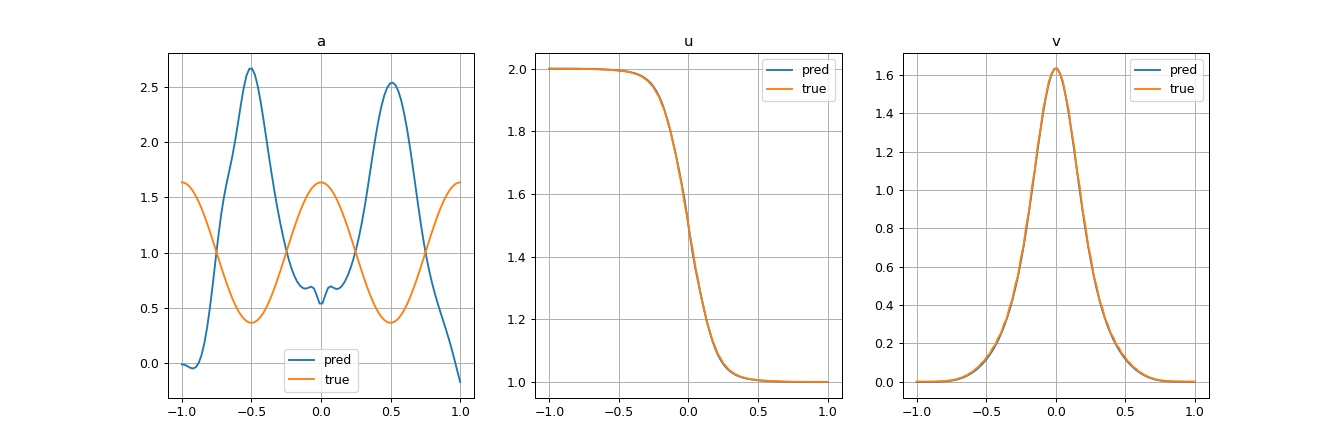

In [6]:
from loss import inverse_model, direct_model
from data import domain
import jax.numpy as jnp
import numpy as np

inverse_params = agent.params[1]
x_test = jnp.linspace(*domain[:, 0], 100).reshape((-1, 1))
a_fn = lambda x: 1+2/np.pi*np.cos(2*np.pi*x)
a_pred = inverse_model(inverse_params, x_test)
a_true = a_fn(x_test)

direct_params = agent.params[0]
t_test = domain[1, 1]*jnp.ones_like(x_test)
uv_pred = direct_model(direct_params, jnp.hstack([x_test, t_test]))

from scipy.io import loadmat
data_true = loadmat("problem2_2_snapshot_epsilon_1e-12.mat")
u_true, v_true = data_true["u_snapshots"][:, -1], data_true["v_snapshots"][:, -1]

import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(x_test, a_pred, label = "pred")
ax[0].plot(x_test, a_true, label = "true")
ax[0].set_title("a")
ax[1].plot(x_test, uv_pred[:, 0:1], label = "pred")
ax[1].plot(x_test, u_true, label = "true")
ax[1].set_title("u")
ax[2].plot(x_test, uv_pred[:, 1:2], label = "pred")
ax[2].plot(x_test, v_true, label = "true")
ax[2].set_title("v")
for ax_ in ax:
	ax_.legend()
	ax_.grid()
plt.show()